In [53]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore") 
from sklearn.metrics import f1_score, roc_auc_score

In [2]:
#reading dataset
df = pd.read_csv("/kaggle/input/pima-indian-dataset/diabetes.csv")

**Exploratory Data Analysis**

In [3]:
 #follow of first 5 data of dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#size of data 
df.shape

(768, 9)

In [5]:
#feature info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


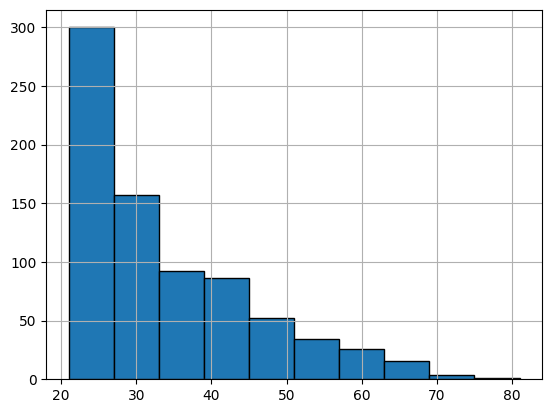

In [6]:
#histogram of age variable
df["Age"].hist(edgecolor="black");

<Axes: xlabel='BMI', ylabel='Density'>

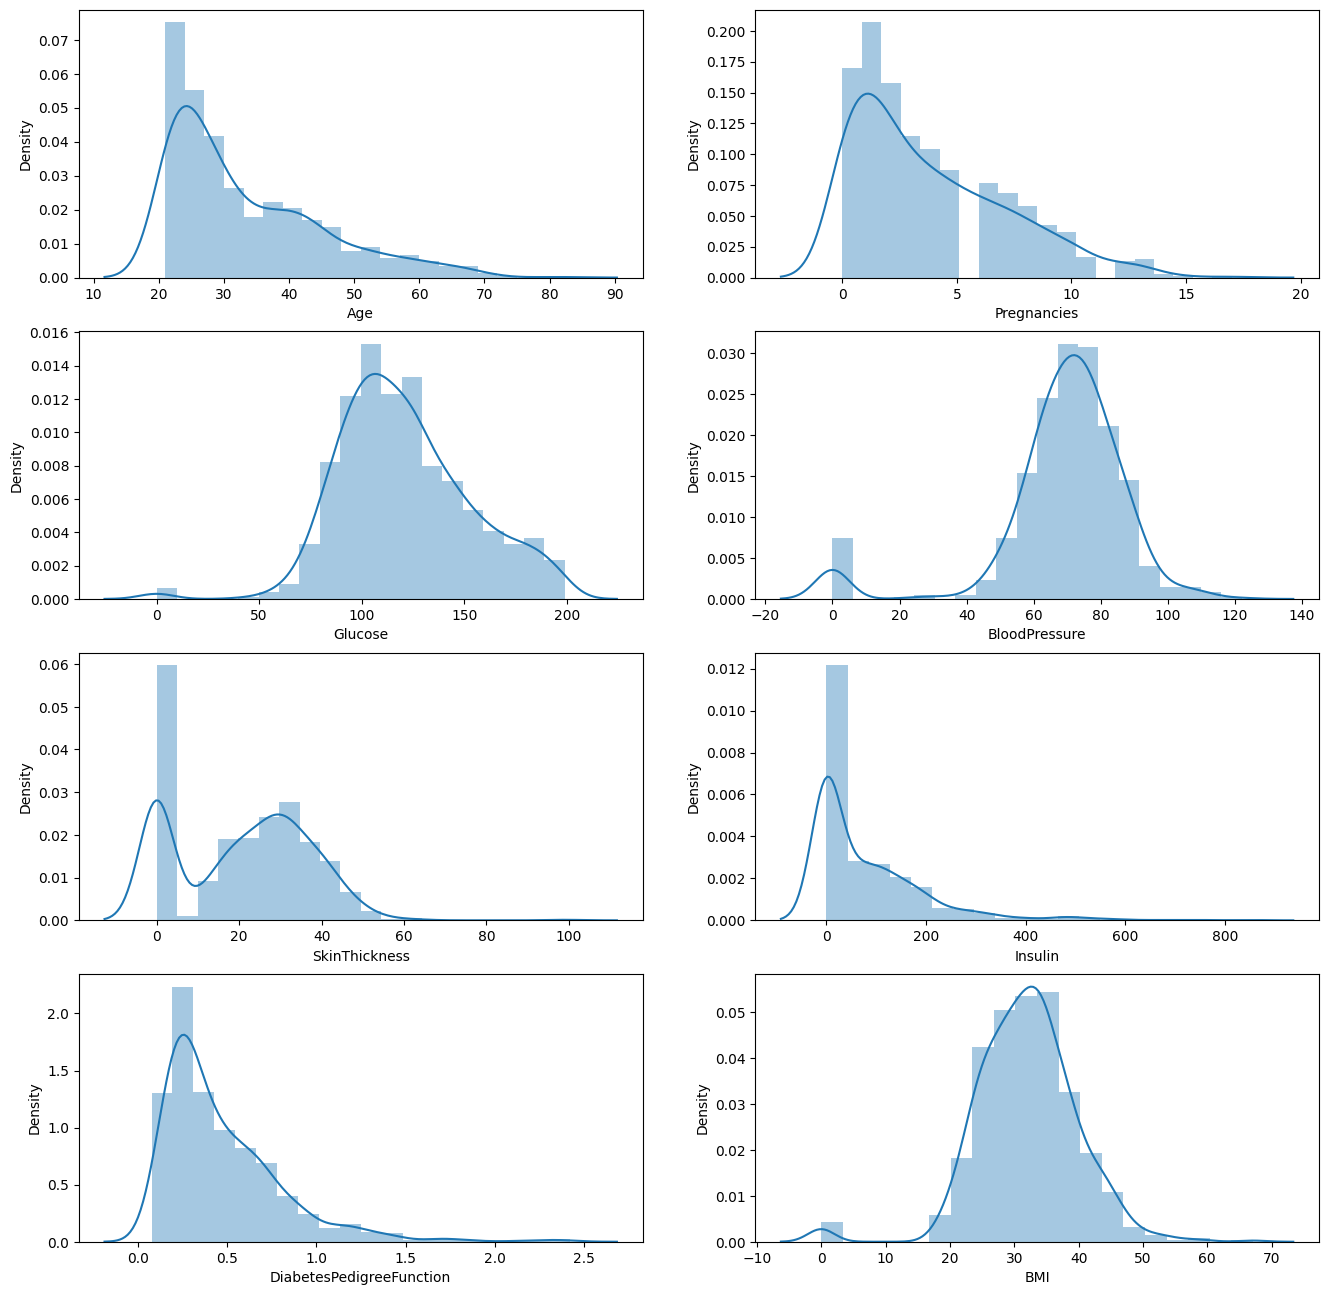

In [7]:
#density and histogram of all variables
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1]) 

In [8]:
df.groupby("Outcome").agg({"Pregnancies":"mean"})


,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [9]:
df.groupby("Outcome").agg({"Age":"mean"})


,Age
Outcome,
0,31.190000
1,37.067164


In [10]:
df.groupby("Outcome").agg({"Age":"max"})


,Age
Outcome,
0,81
1,70


In [11]:

df.groupby("Outcome").agg({"Glucose": "mean"})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [12]:
df.groupby("Outcome").agg({"Glucose": "max"})


,Glucose
Outcome,
0,197
1,199


In [13]:
df.groupby("Outcome").agg({"Insulin": "mean"})


,Insulin
Outcome,
0,68.792000
1,100.335821


In [14]:
df.groupby("Outcome").agg({"Insulin": "max"})

,Insulin
Outcome,
0,744
1,846


In [15]:

df.groupby("Outcome").agg({"BMI": "mean"})


,BMI
Outcome,
0,30.304200
1,35.142537


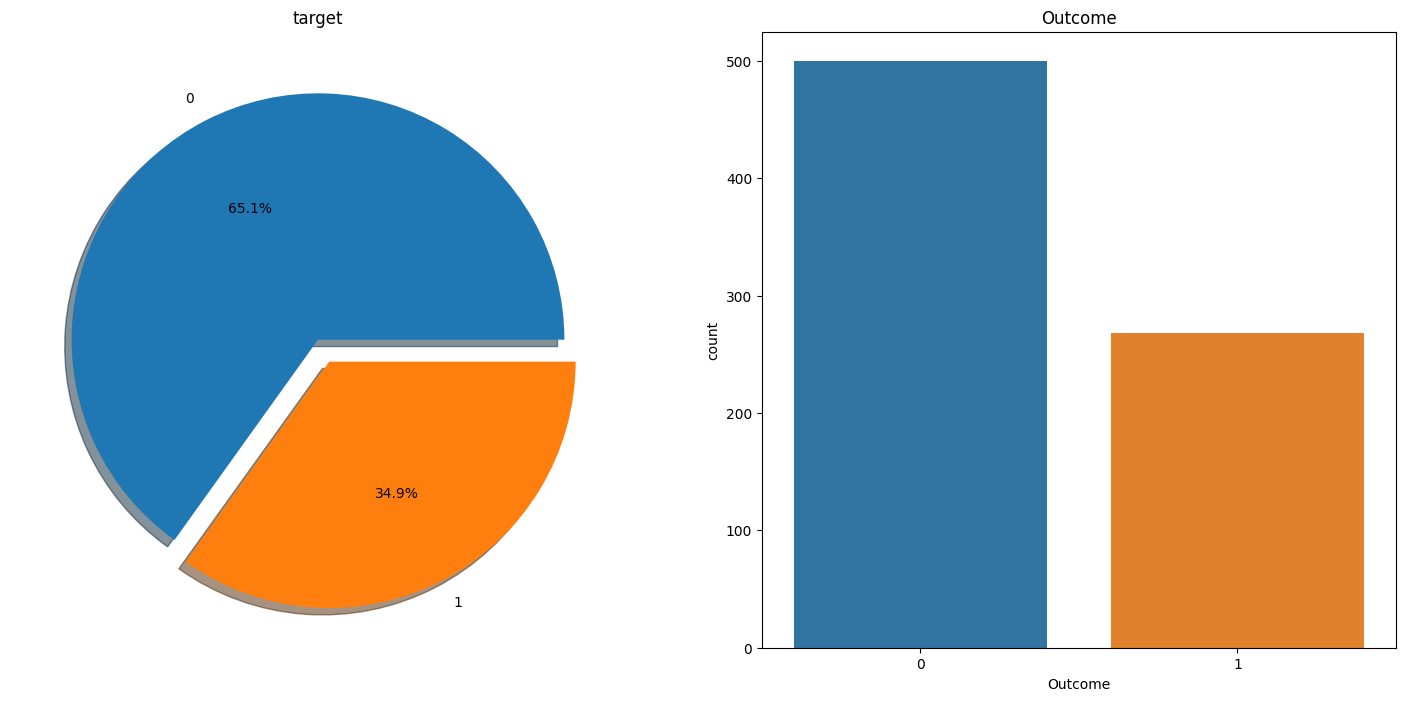

In [16]:
#outcome variable distribution
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(x='Outcome', data = df)
ax[1].set_title('Outcome')
plt.show()

In [17]:
#correlation od data
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


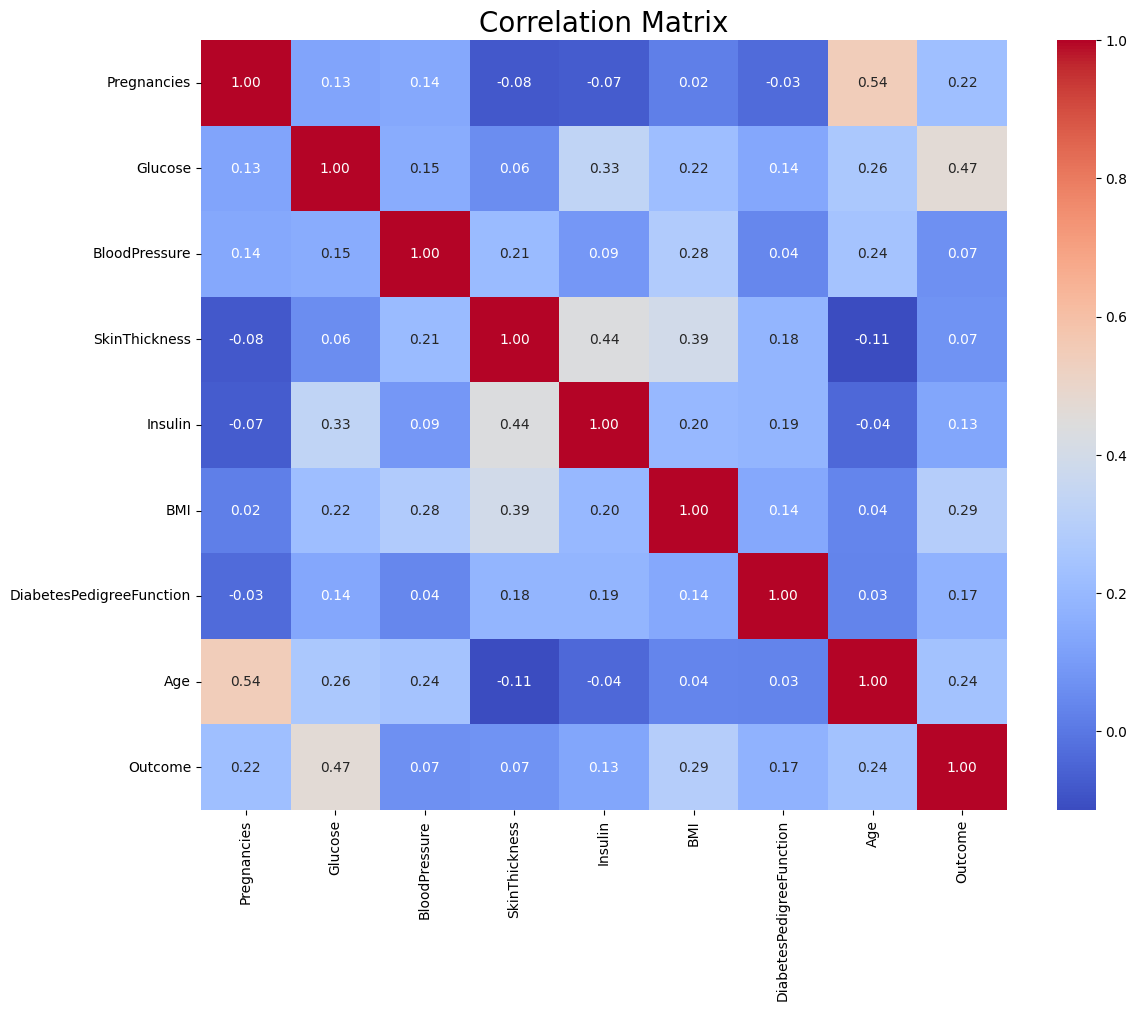

In [18]:
#correlation matrix of dataset 
f, ax = plt.subplots(figsize=(13,10))
sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm",ax=ax)
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

<Axes: xlabel='Outcome', ylabel='Glucose'>

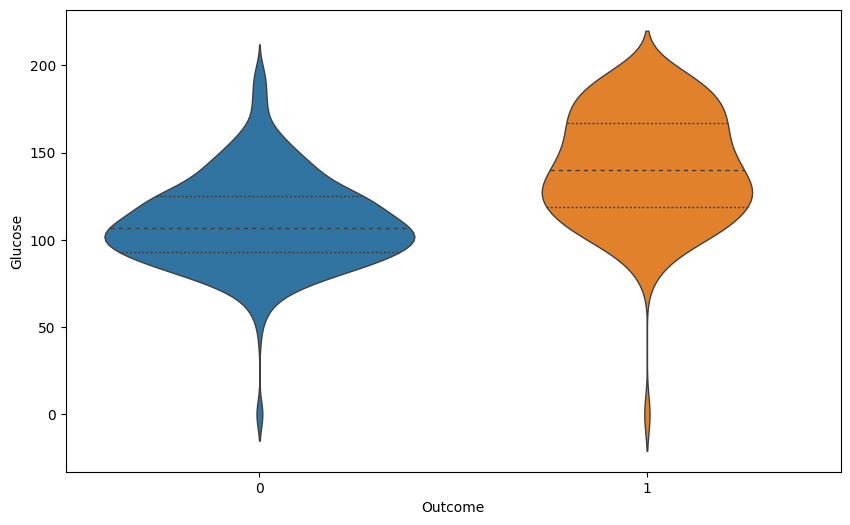

In [19]:
# Explore Gluecose vs Outcome
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="Outcome", y="Glucose",
               split=True, inner="quart", linewidth=1)

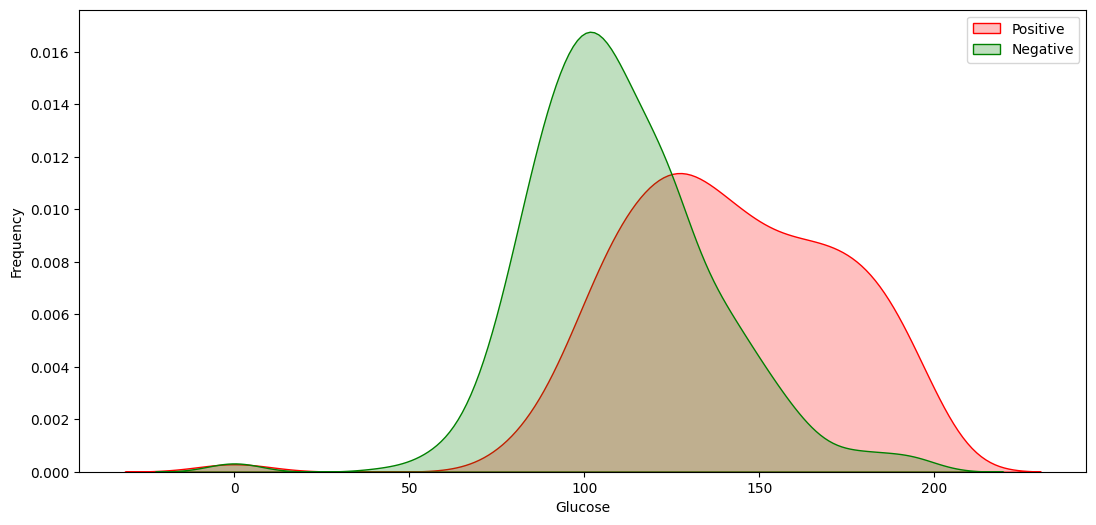

In [20]:
# Explore Glucose vs Outcome

plt.figure(figsize=(13,6))
g = sns.kdeplot(df["Glucose"][df["Outcome"] == 1], color="Red", shade = True)
g = sns.kdeplot(df["Glucose"][df["Outcome"] == 0], ax =g, color="Green", shade= True)
g.set_xlabel("Glucose")
g.set_ylabel("Frequency")
g.legend(["Positive","Negative"])


<Axes: xlabel='Glucose', ylabel='BMI'>

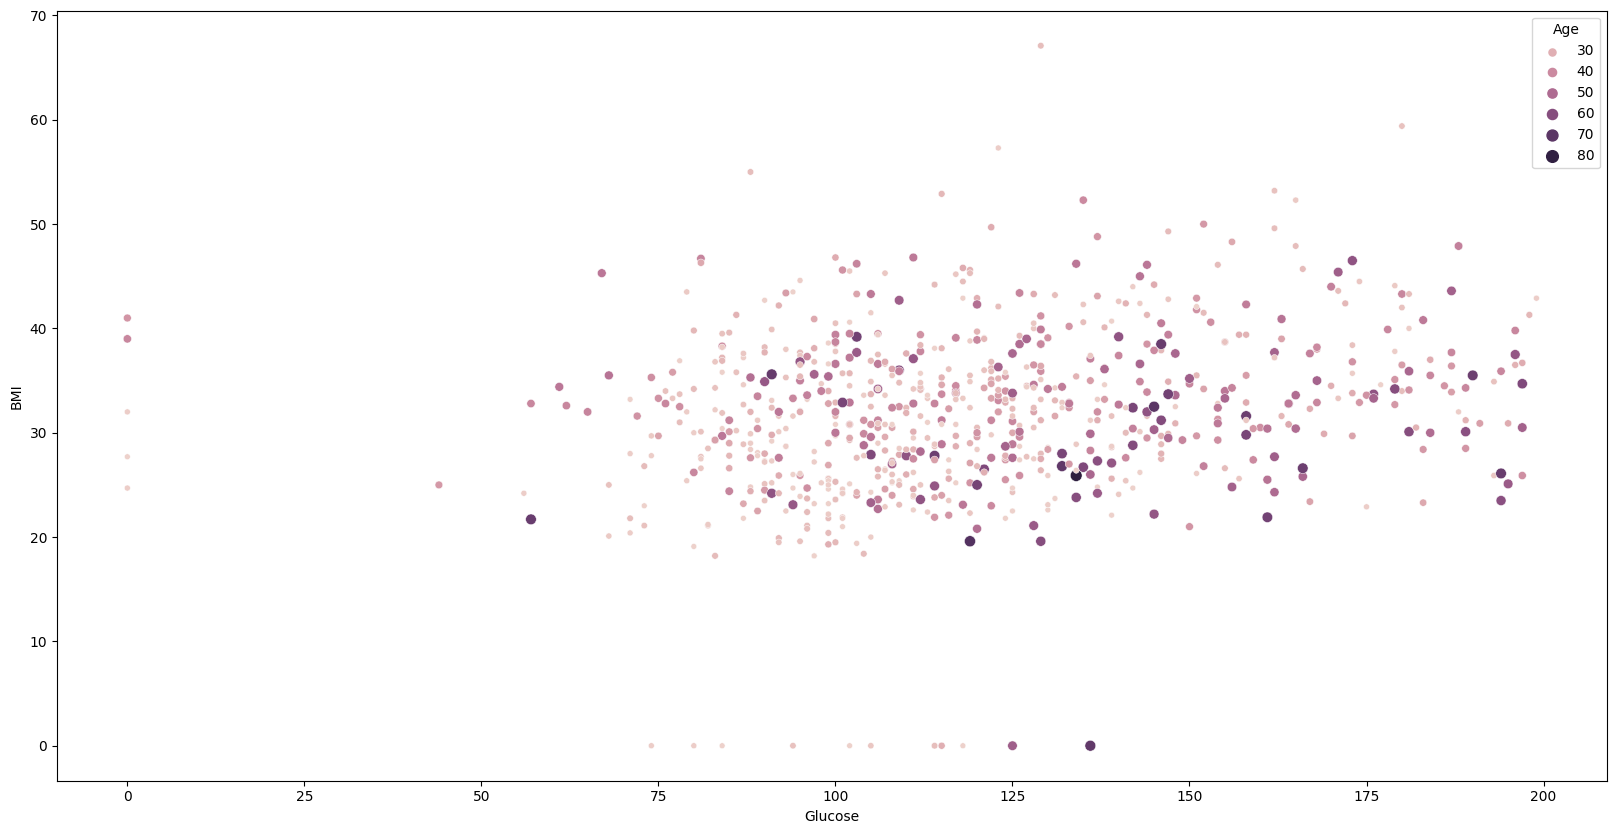

In [21]:
# Glucose vs BMI vs Age

plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x="Glucose", y="BMI", hue="Age", size="Age")

**Data Preprocessing**

In [22]:
#replacing values with 0 with NaN
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [23]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [24]:
#missing value analysis
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [25]:
# Replacing NaN with mean values
df["Glucose"].fillna(df["Glucose"].mean(), inplace = True)
df["BloodPressure"].fillna(df["BloodPressure"].mean(), inplace = True)
df["SkinThickness"].fillna(df["SkinThickness"].mean(), inplace = True)
df["Insulin"].fillna(df["Insulin"].mean(), inplace = True)
df["BMI"].fillna(df["BMI"].mean(), inplace = True)

In [26]:
# Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


**Feature Scaling**

In [27]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
df_scaled = sc.fit_transform(df)

In [28]:
df_scaled = pd.DataFrame(df_scaled)

In [29]:
# Select the 4 features for scaling: Glucose, Insulin, BMI, Age
selected_features = df.iloc[:, [1, 4, 5, 7]].values  # Selecting only the required features

# Apply MinMaxScaler to the selected features
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(selected_features)  # Scale selected features
Y = df.iloc[:, 8].values  

In [30]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 7, stratify = df['Outcome'] )

In [31]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (514, 4)
X_test shape: (254, 4)
Y_train shape: (514,)
Y_test shape: (254,)


**Data Modeling**

In [32]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
# logreg.fit(X_train, Y_train)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2', 'l1'],       # Regularization type
    'solver': ['liblinear', 'saga'], # Solvers for optimization
    'max_iter': [100, 200, 300]    # Maximum number of iterations for the solver
}
logreg = LogisticRegression()
grid_search_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search_logreg.fit(X_train, Y_train)
best_logreg_model = grid_search_logreg.best_estimator_


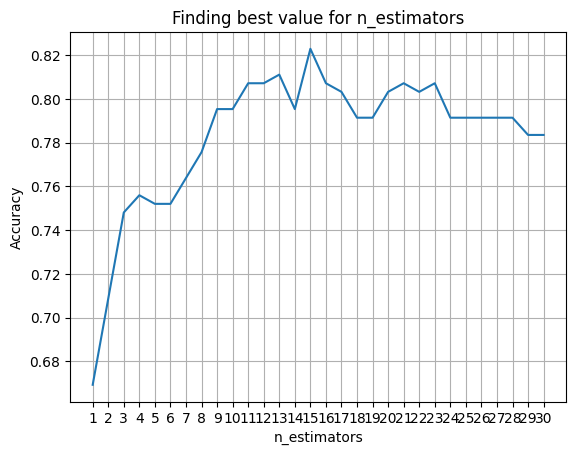

Highest value:  0.8228346456692913


In [33]:
# Plotting a graph for n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc = pd.concat([acc, pd.Series(metrics.accuracy_score(prediction, Y_test))], ignore_index=True)
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [34]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
# knn.fit(X_train, Y_train)

param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 15],  # Number of neighbors to try
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Different distance metrics
    'p': [1, 2],  # Power parameter for Minkowski distance (1=Manhattan, 2=Euclidean)
    'weights': ['uniform', 'distance']  # Weighting function
}
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search_knn.fit(X_train, Y_train)
best_knn_model = grid_search_knn.best_estimator_


In [35]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC

# svc = SVC(kernel = 'linear',random_state=42,C= 1.0)
# svc.fit(X_train, Y_train)

param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'], # Kernel type (linear, radial basis, polynomial)
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'degree': [3, 4, 5],                # Degree for the polynomial kernel
    'coef0': [0, 0.1, 1]                # Independent term in kernel function for 'poly' and 'sigmoid'
}
svc = SVC(random_state=42)
grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search_svc.fit(X_train, Y_train)
best_svc_model = grid_search_svc.best_estimator_

In [36]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
# nb = GaussianNB()
# nb.fit(X_train, Y_train)
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Variance smoothing for numerical stability
}
nb = GaussianNB()
grid_search_nb = GridSearchCV(estimator=nb, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search_nb.fit(X_train, Y_train)
best_nb_model = grid_search_nb.best_estimator_

In [37]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
# dectree = DecisionTreeClassifier(criterion = 'entropy')
# dectree.fit(X_train, Y_train)
param_grid = {
    'criterion': ['gini', 'entropy'],                  # Function to measure the quality of a split
    'max_depth': [None, 10, 20, 30, 40, 50],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],                     # Minimum number of samples required at each leaf node
    'max_features': [None, 'sqrt', 'log2'],            # Number of features to consider for best split
    'splitter': ['best', 'random']                     # Strategy to choose splits at each node
}
dectree = DecisionTreeClassifier(random_state=42)
grid_search_dectree = GridSearchCV(estimator=dectree, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search_dectree.fit(X_train, Y_train)
best_dectree_model = grid_search_dectree.best_estimator_


In [38]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
# ranfor = RandomForestClassifier(n_estimators = 20, criterion = 'entropy')
# ranfor.fit(X_train, Y_train)
param_grid = {
    'n_estimators': [10, 20, 50, 100],            # Number of trees in the forest
    'criterion': ['gini', 'entropy'],             # Function to measure the quality of a split
    'max_depth': [None, 10, 20, 30, 40, 50],      # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],              # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],                # Minimum number of samples to be at a leaf node
    'max_features': ['sqrt', 'log2'],             # Number of features to consider when splitting
    'bootstrap': [True, False]                    # Whether to use bootstrap sampling
}
ranfor = RandomForestClassifier(random_state=42)
grid_search_ranfor = GridSearchCV(estimator=ranfor, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search_ranfor.fit(X_train, Y_train)
best_ranfor_model = grid_search_ranfor.best_estimator_

In [39]:
from xgboost import XGBClassifier

# xgb_model = XGBClassifier(gamma=0)
# xgb_model.fit(X_train, Y_train)
param_grid = {
    'n_estimators': [50, 100, 200],              # Number of trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2],     # Step size shrinking
    'max_depth': [3, 5, 7, 10],                   # Max depth of each tree
    'min_child_weight': [1, 2, 3],                 # Minimum sum of instance weight in a child
    'gamma': [0, 0.1, 0.5, 1],                    # Minimum loss reduction
    'subsample': [0.6, 0.8, 1.0],                 # Fraction of samples to use for each tree
    'colsample_bytree': [0.6, 0.8, 1.0],          # Fraction of features to use for each tree
    'scale_pos_weight': [1, 2]                    # For handling class imbalance
}
xgb_model = XGBClassifier(gamma=0)
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search_xgb.fit(X_train, Y_train)
best_xgb_model = grid_search_xgb.best_estimator_

In [40]:
# Making predictions on test dataset
Y_pred_logreg = best_logreg_model.predict(X_test)
Y_pred_knn = best_knn_model.predict(X_test)
Y_pred_svc = best_svc_model.predict(X_test)
Y_pred_nb = best_nb_model.predict(X_test)
Y_pred_dectree = best_dectree_model.predict(X_test)
Y_pred_ranfor = best_ranfor_model.predict(X_test)
Y_pred_xgb = best_xgb_model.predict(X_test)



**Model Evalutaion**

In [41]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)
accuracy_xgb = accuracy_score(Y_test, Y_pred_xgb)


In [42]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))
print("XgBoost Classifier: " + str(accuracy_xgb * 100))

Logistic Regression: 75.98425196850394
K Nearest neighbors: 82.28346456692913
Support Vector Classifier: 77.16535433070865
Naive Bayes: 75.19685039370079
Decision tree: 73.22834645669292
Random Forest: 73.22834645669292
XgBoost Classifier: 76.37795275590551


In [56]:
# Predict probabilities for AUC (if available)
Y_pred_logreg_proba = best_logreg_model.predict_proba(X_test)[:, 1]
Y_pred_knn_proba = best_knn_model.predict_proba(X_test)[:, 1]
Y_pred_svc_proba = best_svc_model.decision_function(X_test) if hasattr(best_svc_model, "decision_function") else best_svc_model.predict_proba(X_test)[:, 1]
Y_pred_nb_proba = best_nb_model.predict_proba(X_test)[:, 1]
Y_pred_dectree_proba = best_dectree_model.predict_proba(X_test)[:, 1]
Y_pred_ranfor_proba = best_ranfor_model.predict_proba(X_test)[:, 1]
Y_pred_xgb_proba = best_xgb_model.predict_proba(X_test)[:, 1]

In [57]:
# F1 Scores
f1_logreg = f1_score(Y_test, Y_pred_logreg)
f1_knn = f1_score(Y_test, Y_pred_knn)
f1_svc = f1_score(Y_test, Y_pred_svc)
f1_nb = f1_score(Y_test, Y_pred_nb)
f1_dectree = f1_score(Y_test, Y_pred_dectree)
f1_ranfor = f1_score(Y_test, Y_pred_ranfor)
f1_xgb = f1_score(Y_test, Y_pred_xgb)

In [58]:
# AUC Scores
auc_logreg = roc_auc_score(Y_test, Y_pred_logreg_proba)
auc_knn = roc_auc_score(Y_test, Y_pred_knn_proba)
auc_svc = roc_auc_score(Y_test, Y_pred_svc_proba)
auc_nb = roc_auc_score(Y_test, Y_pred_nb_proba)
auc_dectree = roc_auc_score(Y_test, Y_pred_dectree_proba)
auc_ranfor = roc_auc_score(Y_test, Y_pred_ranfor_proba)
auc_xgb = roc_auc_score(Y_test, Y_pred_xgb_proba)

In [59]:
#Knn have highest accuracy i.e 82.28 comparing to other algorithm
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
cm

array([[150,  15],
       [ 30,  59]])

<Axes: >

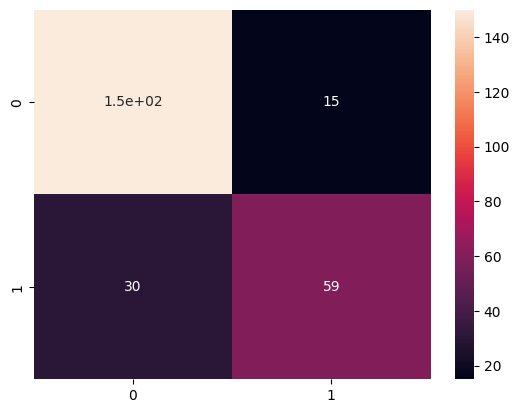

In [60]:
# Heatmap of Confusion matrix (KNN)
sns.heatmap(pd.DataFrame(cm), annot=True)

In [61]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       165
           1       0.80      0.66      0.72        89

    accuracy                           0.82       254
   macro avg       0.82      0.79      0.80       254
weighted avg       0.82      0.82      0.82       254



**Saving Model**

In [62]:
import pickle

#dump to save the model
model = pickle.dumps(best_knn_model)

#load of the model
knn_pickle = pickle.loads(model)

#use of model for prediction
knn_pickle.predict(X_test)


array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1])

**Experiments**

In [47]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [48]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1
767,1,93.0,70.0,31.00000,155.548223,30.4,0.315,23,0


In [49]:
# from sklearn.inspection import permutation_importance
# import matplotlib.pyplot as plt

# # Compute permutation importance
# result = permutation_importance(knn, X_test, Y_test, n_repeats=10, random_state=42)

# # Create a pandas Series for importance
# importance = pd.Series(result.importances_mean, index=X.columns)

# # Plot feature importance
# importance.plot(kind='barh', title="Feature Importances (KNN)")
# plt.xlabel("Mean Importance Score")
# plt.ylabel("Features")
# plt.show()

In [63]:
 # Ensure the input has the same 4 features: Glucose, Insulin, BMI, Age
input_data = [[101, 190,32.9, 63]]  # Glucose, Insulin, BMI, Age (For person with ID 763)

# Scale the input using the same MinMaxScaler
scaled_input = sc.transform(input_data)

# Make a prediction using the KNN model
prediction = best_knn_model.predict(scaled_input)

# Output the result
print(prediction)
if prediction[0] == 1:
    print("The person has diabetes.")
else:
    print("The person does not have diabetes.")


[0]
The person does not have diabetes.


In [64]:
input_data2 = [[148, 155.54, 33.6, 50]]  # Glucose, Insulin, BMI, Age (For person with ID 0)

# Scale the input using the same MinMaxScaler
scaled_input2 = sc.transform(input_data2)

# Make a prediction using the KNN model
prediction = best_knn_model.predict(scaled_input2)

# Output the result
print(prediction)
if prediction[0] == 1:
    print("The person has diabetes.")
else:
    print("The person does not have diabetes.")

[1]
The person has diabetes.


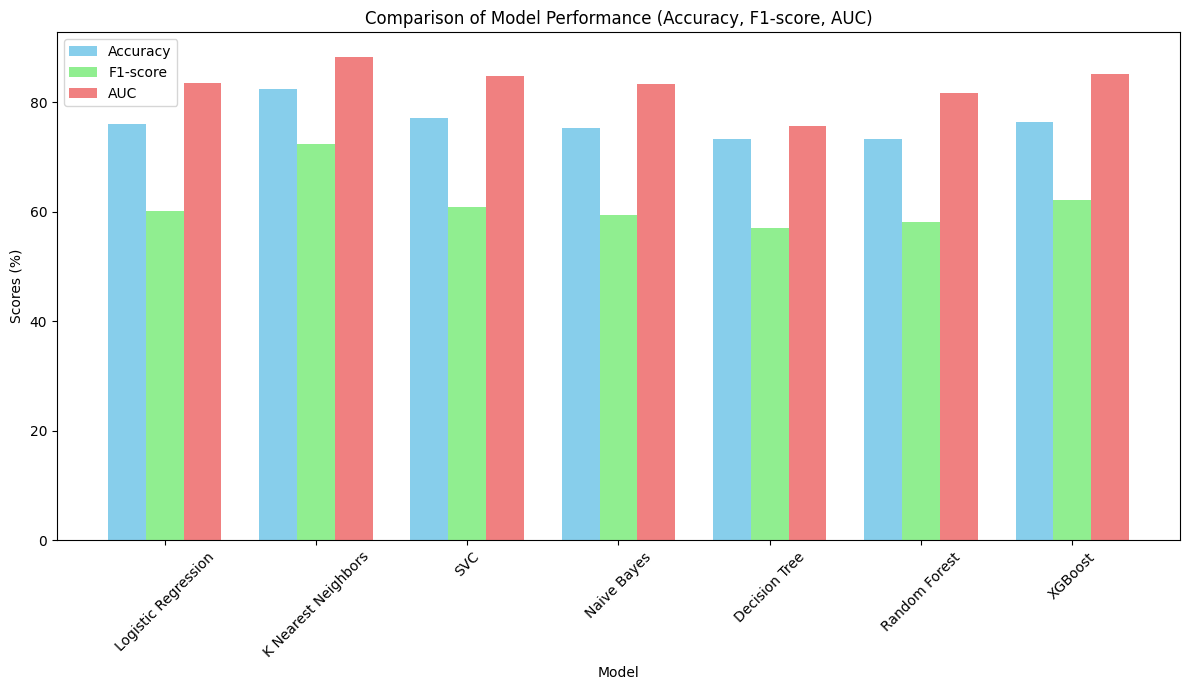

In [65]:
models = ['Logistic Regression', 'K Nearest Neighbors', 'SVC', 'Naive Bayes', 
          'Decision Tree', 'Random Forest', 'XGBoost']


accuracy = [accuracy_logreg, accuracy_knn, accuracy_svc, accuracy_nb, accuracy_dectree, accuracy_ranfor, accuracy_xgb]
f1_scores = [f1_logreg, f1_knn, f1_svc, f1_nb, f1_dectree, f1_ranfor, f1_xgb]
auc_scores = [auc_logreg, auc_knn, auc_svc, auc_nb, auc_dectree, auc_ranfor, auc_xgb]

# Set up the positions of the bars on the x-axis
x = np.arange(len(models))  # the label locations
width = 0.25  # width of the bars

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 7))

bar1 = ax.bar(x - width, [acc * 100 for acc in accuracy], width, label='Accuracy', color='skyblue')
bar2 = ax.bar(x, [f1 * 100 for f1 in f1_scores], width, label='F1-score', color='lightgreen')
bar3 = ax.bar(x + width, [auc * 100 for auc in auc_scores], width, label='AUC', color='lightcoral')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Model')
ax.set_ylabel('Scores (%)')
ax.set_title('Comparison of Model Performance (Accuracy, F1-score, AUC)')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()